In [ ]:
# 📊 Telco Customer Churn Analysis

This project explores and analyzes a telecom company's customer base to understand churn patterns, customer behavior, and profitability. The goal is to identify factors contributing to customer churn and generate actionable business insights using Pandas, NumPy, Seaborn, and Matplotlib.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (7, 4)


In [4]:
df = pd.read_csv("telco_customer_churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape


(7043, 21)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df.nunique()


customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [10]:
df["TotalCharges"].unique()[:10] 


array(['29.85', '1889.5', '108.15', '1840.75', '151.65', '820.5',
       '1949.4', '301.9', '3046.05', '3487.95'], dtype=object)

In [11]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")


In [12]:
df.dropna(subset=["TotalCharges"], inplace=True)


In [13]:
df["SeniorCitizen"] = df["SeniorCitizen"].astype("category")


In [14]:
df["Churn"].value_counts()


Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [15]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})


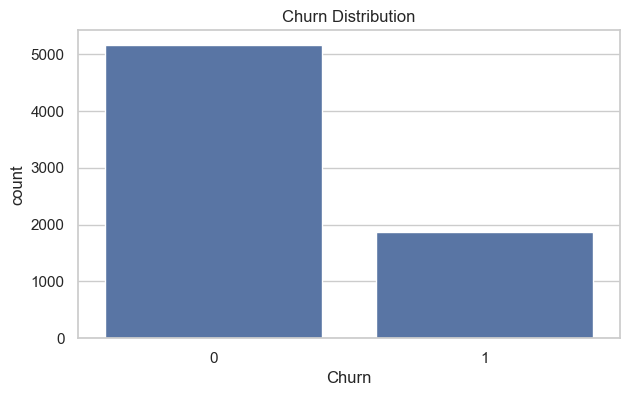

In [16]:
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()


In [17]:
df.groupby("Churn")["tenure"].mean()


Churn
0    37.650010
1    17.979133
Name: tenure, dtype: float64

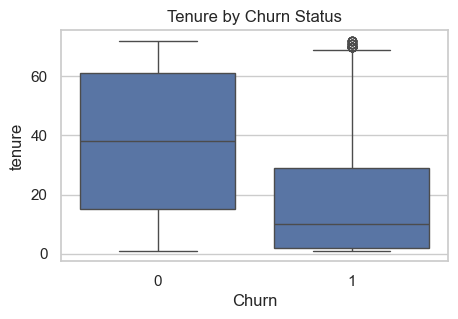

In [30]:
plt.figure(figsize=(5, 3))
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure by Churn Status")
plt.show()


In [19]:
df.groupby("Churn")[["MonthlyCharges", "TotalCharges"]].mean()


,MonthlyCharges,TotalCharges
Churn,,
0,61.307408,2555.344141
1,74.441332,1531.796094


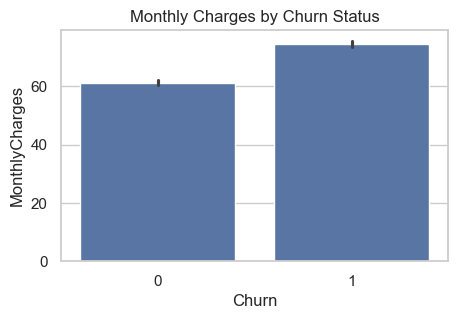

In [29]:
plt.figure(figsize=(5,3))
sns.barplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges by Churn Status")
plt.show()


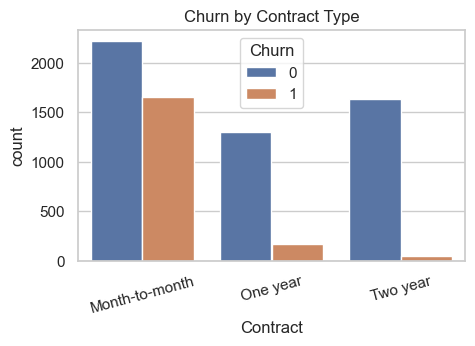

In [28]:
plt.figure(figsize=(5, 3))
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Churn by Contract Type")
plt.xticks(rotation=15)
plt.show()


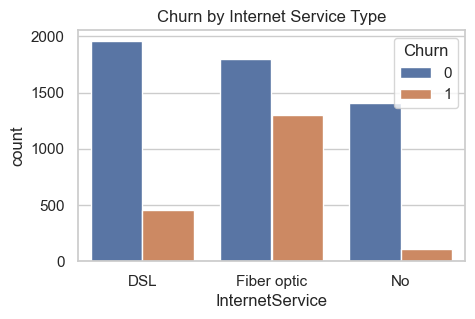

In [31]:
plt.figure(figsize=(5,3))
sns.countplot(x="InternetService", hue="Churn", data=df)
plt.title("Churn by Internet Service Type")
plt.show()


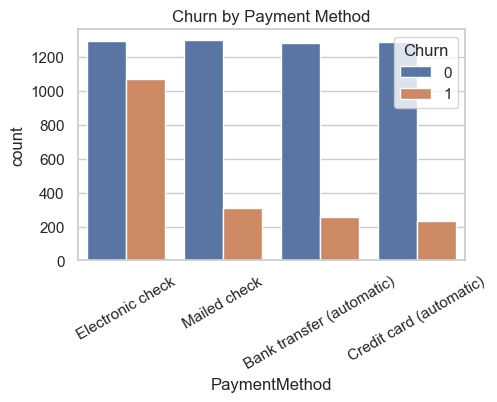

In [32]:
plt.figure(figsize=(5,3))
sns.countplot(x="PaymentMethod", hue="Churn", data=df)
plt.title("Churn by Payment Method")
plt.xticks(rotation=30)
plt.show()


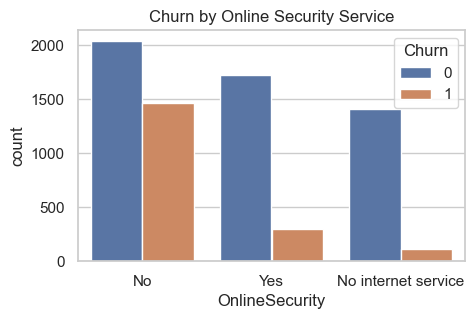

In [33]:
plt.figure(figsize=(5,3))
sns.countplot(x="OnlineSecurity", hue="Churn", data=df)
plt.title("Churn by Online Security Service")
plt.show()


In [25]:
numeric_df = df.select_dtypes(include=["float64", "int64"])


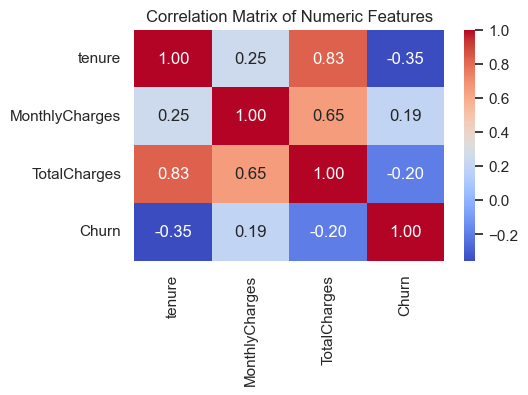

In [34]:
plt.figure(figsize=(5, 3))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()


In [ ]:
###  Key Takeaways

- Customers on month-to-month contracts show the highest churn rates.
- Those without online security or tech support are more likely to leave.
- Higher monthly charges and shorter tenure both correlate with churn.
- Long-term customers on yearly contracts rarely churn, even with high total charges.

###  Business Recommendations

- Encourage long-term contracts with loyalty discounts.
- Bundle online security or tech support as retention incentives.
- Identify high-risk groups early based on billing and service patterns.
